In [131]:
import pandas as pd
import openpyxl
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import rcParams
import re
import calendar
import os
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

In [132]:
from time import clock
from datetime import datetime
from pyhive import hive
from impala.dbapi import connect
from impala.util import as_pandas
from pandas_profiling import ProfileReport

In [23]:
host_name = "10.107.6.14"
port = 10000
user = "hdfs"
password = "bigid#01"
database="gcrm"

conn = hive.Connection(host=host_name, port=port, username=user, password=password,
                           database=database, auth='CUSTOM')

In [ ]:
start_time = datetime.now()
print("start time : ",start_time)

cursor = conn.cursor()
cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217 where created>="2015-01-01" and created<"2021-02-01"')
#cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217')

#s_srv_req_head = as_pandas(cursor)
s_srv_req_x_raw = pd.DataFrame(cursor)


end_time = datetime.now()

print('Read Duration: {}'.format(end_time - start_time))

print("s_srv_req_x_raw shape:",s_srv_req_x_raw.shape)
s_srv_req_x_raw.head(2)

In [9]:
s_srv_req_x_raw.columns = s_srv_req_x_head.columns
print(s_srv_req_x_raw.shape)
s_srv_req_x_raw.head(2)

(3753439, 117)


,row_num,row_id,created,created_by,last_upd,last_upd_by,modification_num,conflict_id,par_row_id,attrib_08,...,x_sr_fnl_close_dt,x_sr_fnl_close_rmrks,x_dlr_ack_dt,x_sr_attr3_area,x_sr_attr3_sub_area,x_sr_attr3_type,x_sr_attr4_area,x_sr_attr4_sub_area,x_sr_attr4_type,x_sr_excld_plcy_no
0,1235894,1-3UHC9B,2015-09-05,1-1GO0P,2015-09-05,1-1GO0P,2,0,1-3UHC9B,N,...,None,null,None,null,null,null,null,null,null,null
1,1235895,1-3UHC9F,2015-09-05,1-1GO0P,2015-09-05,1-1GO0P,2,0,1-3UHC9F,N,...,None,null,None,null,null,null,null,null,null,null


In [8]:
start_time = datetime.now()
print("start time : ",start_time)

cursor = conn.cursor()
#cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217 where created>="2015-01-01" and created<"2021-02-01"')
cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217 limit 5')

s_srv_req_x_head = as_pandas(cursor)
#s_srv_req_x_raw = pd.DataFrame(cursor)


end_time = datetime.now()

print('Read Duration: {}'.format(end_time - start_time))

print("s_srv_req_x_raw shape:",s_srv_req_x_head.shape)
s_srv_req_x_head.head(2)

start time :  2021-03-01 16:40:59.951825
Read Duration: 0:00:00.216728
s_srv_req_x_raw shape: (5, 117)


,row_num,row_id,created,created_by,last_upd,last_upd_by,modification_num,conflict_id,par_row_id,attrib_08,...,x_sr_fnl_close_dt,x_sr_fnl_close_rmrks,x_dlr_ack_dt,x_sr_attr3_area,x_sr_attr3_sub_area,x_sr_attr3_type,x_sr_attr4_area,x_sr_attr4_sub_area,x_sr_attr4_type,x_sr_excld_plcy_no
0,1,1-2JF4-822,2014-07-14,1-1ELWQ,2014-07-14,1-1ELWQ,0,0,1-2JF4-822,N,...,None,null,None,null,null,null,null,null,null,null
1,2,1-2JF4-823,2014-07-14,1-1ELWQ,2014-07-14,1-1ELWQ,0,0,1-2JF4-823,N,...,None,null,None,null,null,null,null,null,null,null


In [10]:
start_time = datetime.now()
print("start time : ",start_time)

s_srv_req_x_raw_prof = ProfileReport(s_srv_req_x_raw)

end_time = datetime.now()
print('Read Duration: {}'.format(end_time - start_time))

start time :  2021-03-01 16:42:44.518249
Read Duration: 0:04:43.305522


In [11]:
s_srv_req_x_raw_prof.to_file("s_srv_req_x_raw_prof_complete.html")

In [24]:
start_time = datetime.now()
print("start time : ",start_time)

cursor = conn.cursor()
cursor.execute('select * from gcrm.temp_lov_20210301')
#cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217')

lov_raw = as_pandas(cursor)
#lov_raw = pd.DataFrame(cursor)


end_time = datetime.now()

print('Read Duration: {}'.format(end_time - start_time))

print("lov_raw shape:",lov_raw.shape)
lov_raw.head(2)

start time :  2021-03-05 13:58:40.424742
Read Duration: 0:00:04.592352
lov_raw shape: (34641, 35)


,row_id,created,created_by,last_upd,last_upd_by,dcking_num,modification_num,conflict_id,par_row_id,active_flg,...,weighting_factor,bitmap_id,bu_id,code,db_last_upd_src,desc_text,high,integration_id,low,sub_type
0,1-EYNW,1980-01-01,0-1,1980-01-01,0-1,0E-7,1,0,null,Y,...,None,null,null,null,null,For Create List Data Source Num Id field in th...,null,null,null,null
1,1-EYNX,1980-01-01,0-1,1980-01-01,0-1,0E-7,1,0,null,Y,...,None,null,null,null,null,For Create List Integration Id field in the BO...,null,null,null,null


In [25]:
start_time = datetime.now()
print("start time : ",start_time)

lov_raw_prof = ProfileReport(lov_raw)

end_time = datetime.now()
print('Read Duration: {}'.format(end_time - start_time))

start time :  2021-03-05 17:31:31.171869
Read Duration: 0:00:15.268860


In [26]:
lov_raw_prof.to_file("lov_raw_prof.html")

In [ ]:
start_time = datetime.now()
print("start time : ",start_time)

cursor = conn.cursor()
cursor.execute('select * from gcrm.s_srv_req where created >= "2015-01-01" and created < "2021-01-01"')
#cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217')
#cursor.execute('SELECT count(*),max(created),min(created) FROM s_srv_req where created >= "2015-01-01" and created < "2021-01-01"')
s_srv_req_raw = as_pandas(cursor)
#lov_raw = pd.DataFrame(cursor)


end_time = datetime.now()

print('Read Duration: {}'.format(end_time - start_time))

print("lov_raw shape:",s_srv_req_raw.shape)
s_srv_req_raw.head(2)

start time :  2021-03-05 17:41:54.564604


In [127]:
s_srv_req_raw.shape

(5, 227)

In [130]:
host_name = "10.107.6.14"
port = 10000
user = "hdfs"
password = "bigid#01"
database_cmpl_mart="complaint_mart"

conn = hive.Connection(host=host_name, port=port, username=user, password=password,
                           database=database_cmpl_mart, auth='CUSTOM')

In [32]:
start_time = datetime.now()
print("start time : ",start_time)

cursor = conn.cursor()
cursor.execute('select * from complaint_mart.ser_rcrepm_cmpl_5years')
#cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217')
#cursor.execute('SELECT count(*),max(created),min(created) FROM s_srv_req where created >= "2015-01-01" and created < "2021-01-01"')
ser_rcrepm_cmpl_5years_raw = as_pandas(cursor)
#lov_raw = pd.DataFrame(cursor)


end_time = datetime.now()

print('Read Duration: {}'.format(end_time - start_time))

print("lov_raw shape:",ser_rcrepm_cmpl_5years_raw.shape)
ser_rcrepm_cmpl_5years_raw.head(2)

start time :  2021-03-22 16:13:33.169975
Read Duration: 0:29:39.655808
lov_raw shape: (3643662, 116)


,rownm,repm_cmpn_no,repm_corp_no,repm_dlr_no,repm_ro_no,repm_vin,repm_cust_no,repm_ro_stat,repm_estmt_no,repm_bkng_no,...,repm_wash_end_dtime,repm_wash_advsr_no,repm_wash_remark,repm_dlr_code,repm_exit_milg,repm_file_doc_id,repm_atof_rslt_no,repm_fi_stat,repm_wash_stat,repm_ro_mobile_flag
0,613337,H,A10AA,W5226,R201703734,MALDN41VR5M005877,C2017080069,D,null,WA00111806,...,NaT,null,null,W5226,NaN,null,null,null,null,null
1,613358,H,A10AA,W5226,R201704604,MALDN41VR5M005877,C2017080069,D,null,null,...,NaT,null,null,W5226,NaN,null,null,null,null,null


In [33]:
ser_rcrepm_cmpl_5years_raw.shape

(3643662, 116)

In [ ]:
'repm_dlr_code', 'repm_cust_no', 'repm_ro_no'

In [36]:
serv_grp_1 = ser_rcrepm_cmpl_5years_raw[['repm_dlr_code', 'repm_cust_no', 'repm_ro_no', 'repm_vin', 'repm_ro_dtime', 'repm_work_type', 'repm_milg']]
serv_grp_1.shape

(3643662, 7)

In [37]:
serv_grp_1 = serv_grp_1.drop_duplicates(subset=['repm_dlr_code', 'repm_cust_no', 'repm_vin', 'repm_ro_dtime','repm_work_type', 'repm_milg'])
serv_grp_1.shape

(3643309, 7)

In [38]:
serv_grp_1['repm_ro_dtime'] = pd.to_datetime(serv_grp_1['repm_ro_dtime'])

In [40]:
serv_grp_1 = serv_grp_1.sort_values(['repm_cust_no', 'repm_vin', 'repm_work_type', 'repm_ro_dtime'], ascending=[True, 
                                                                                                                  True, True,
                                                                                                                  False])

In [102]:
serv_grp_1.head()

,repm_dlr_code,repm_cust_no,repm_ro_no,repm_vin,repm_ro_dtime,repm_work_type,repm_milg,year,day_diff,Repeat_visit_month,Repeat_visit_three_month,rv_3_count,serv_count_last_one,serv_count_last_three,Max_service_dlr_code,rv_1_count,serv_count_allyear
1530233,W3213,B2009110008,R201614740,MALBM51BLGM247250,2016-10-14 12:00:08,AC,10,2016,NaN,False,False,3.0,2.0,3.0,W3417,1.0,8
1281734,W2217,B2009110016,R201910302,MALBM51BLJM580814,2019-07-17 08:35:16,AR,17496,2019,37.0,False,True,6.0,1.0,8.0,W2256,1.0,8
1281733,W2217,B2009110016,R201911703,MALBM51BLJM580814,2019-08-19 14:49:27,FS,20156,2019,33.0,False,True,6.0,1.0,8.0,W2256,1.0,8
1281736,W2217,B2009110016,R201907689,MALBM51BLJM580814,2019-05-24 16:18:16,FS,10522,2019,38.0,False,True,6.0,1.0,8.0,W2256,1.0,8
1281735,W2217,B2009110016,R201903492,MALBM51BLJM580814,2019-03-04 12:00:39,FS,1580,2019,51.0,False,True,6.0,1.0,8.0,W2256,1.0,8


In [46]:
serv_grp_1[serv_grp_1['repm_cust_no'] =="null"].shape

(139869, 7)

In [47]:
serv_grp_1['year'] = serv_grp_1['repm_ro_dtime'].dt.year

In [48]:
serv_grp_1['day_diff'] = serv_grp_1.sort_values(['repm_vin', 'repm_ro_dtime'], ascending=[True,False]).groupby(
    ['repm_vin'])['repm_ro_dtime'].apply(lambda x: x - x.shift(-1))

In [51]:
serv_grp_1[serv_grp_1['repm_vin']=='MALBM51BLJM580814']

,repm_dlr_code,repm_cust_no,repm_ro_no,repm_vin,repm_ro_dtime,repm_work_type,repm_milg,year,day_diff
1281734,W2217,B2009110016,R201910302,MALBM51BLJM580814,2019-07-17 08:35:16,AR,17496,2019,37 days 17:28:49
1281733,W2217,B2009110016,R201911703,MALBM51BLJM580814,2019-08-19 14:49:27,FS,20156,2019,33 days 06:14:11
1281736,W2217,B2009110016,R201907689,MALBM51BLJM580814,2019-05-24 16:18:16,FS,10522,2019,38 days 01:41:36
1281735,W2217,B2009110016,R201903492,MALBM51BLJM580814,2019-03-04 12:00:39,FS,1580,2019,51 days 23:46:16
1281739,W2217,B2009110016,R201905564,MALBM51BLJM580814,2019-04-16 14:36:40,RR,4505,2019,43 days 02:36:01
1281738,W2201,C2019020284,R201912779,MALBM51BLJM580814,2019-06-09 15:06:27,RR,11768,2019,15 days 22:48:11
3609240,W2256,C2020010996,R202000091,MALBM51BLJM580814,2020-01-08 00:00:00,PS,32405,2020,141 days 09:10:33
1281737,W2217,null,R201900602,MALBM51BLJM580814,2019-01-11 12:14:23,PD,19,2019,NaT


In [52]:
serv_grp_1[serv_grp_1['repm_vin']=='MALBM51BLJM580814'].sort_values(['repm_vin', 'repm_ro_dtime'], ascending=[True,False])

,repm_dlr_code,repm_cust_no,repm_ro_no,repm_vin,repm_ro_dtime,repm_work_type,repm_milg,year,day_diff
3609240,W2256,C2020010996,R202000091,MALBM51BLJM580814,2020-01-08 00:00:00,PS,32405,2020,141 days 09:10:33
1281733,W2217,B2009110016,R201911703,MALBM51BLJM580814,2019-08-19 14:49:27,FS,20156,2019,33 days 06:14:11
1281734,W2217,B2009110016,R201910302,MALBM51BLJM580814,2019-07-17 08:35:16,AR,17496,2019,37 days 17:28:49
1281738,W2201,C2019020284,R201912779,MALBM51BLJM580814,2019-06-09 15:06:27,RR,11768,2019,15 days 22:48:11
1281736,W2217,B2009110016,R201907689,MALBM51BLJM580814,2019-05-24 16:18:16,FS,10522,2019,38 days 01:41:36
1281739,W2217,B2009110016,R201905564,MALBM51BLJM580814,2019-04-16 14:36:40,RR,4505,2019,43 days 02:36:01
1281735,W2217,B2009110016,R201903492,MALBM51BLJM580814,2019-03-04 12:00:39,FS,1580,2019,51 days 23:46:16
1281737,W2217,null,R201900602,MALBM51BLJM580814,2019-01-11 12:14:23,PD,19,2019,NaT


In [101]:
serv_grp_1.head()

,repm_dlr_code,repm_cust_no,repm_ro_no,repm_vin,repm_ro_dtime,repm_work_type,repm_milg,year,day_diff,Repeat_visit_month,Repeat_visit_three_month,rv_3_count,serv_count_last_one,serv_count_last_three,Max_service_dlr_code,rv_1_count,serv_count_allyear
1530233,W3213,B2009110008,R201614740,MALBM51BLGM247250,2016-10-14 12:00:08,AC,10,2016,NaN,False,False,3.0,2.0,3.0,W3417,1.0,8
1281734,W2217,B2009110016,R201910302,MALBM51BLJM580814,2019-07-17 08:35:16,AR,17496,2019,37.0,False,True,6.0,1.0,8.0,W2256,1.0,8
1281733,W2217,B2009110016,R201911703,MALBM51BLJM580814,2019-08-19 14:49:27,FS,20156,2019,33.0,False,True,6.0,1.0,8.0,W2256,1.0,8
1281736,W2217,B2009110016,R201907689,MALBM51BLJM580814,2019-05-24 16:18:16,FS,10522,2019,38.0,False,True,6.0,1.0,8.0,W2256,1.0,8
1281735,W2217,B2009110016,R201903492,MALBM51BLJM580814,2019-03-04 12:00:39,FS,1580,2019,51.0,False,True,6.0,1.0,8.0,W2256,1.0,8


In [53]:
serv_grp_1['day_diff'] = serv_grp_1['day_diff'].dt.days

In [54]:
serv_grp_1['Repeat_visit_month'] = np.where((serv_grp_1['day_diff']<30), True, False)

In [55]:
serv_grp_1['Repeat_visit_three_month'] = np.where((serv_grp_1['day_diff']<100), True, False)

In [103]:
serv_grp_1['Lost_customer'] = np.where((serv_grp_1['day_diff']>550), True, False)

In [105]:
display("Repeat_visit_month",serv_grp_1['Repeat_visit_month'].value_counts())
display("Repeat_visit_three_month", serv_grp_1['Repeat_visit_three_month'].value_counts())
display("Lost_customer", serv_grp_1['Lost_customer'].value_counts())

'Repeat_visit_month'

False    2723006
True      920303
Name: Repeat_visit_month, dtype: int64

'Repeat_visit_three_month'

True     1894246
False    1749063
Name: Repeat_visit_three_month, dtype: int64

'Lost_customer'

False    3600063
True       43246
Name: Lost_customer, dtype: int64

In [88]:
serv_rv_one_flags = serv_grp_1[serv_grp_1['Repeat_visit_month']==True].groupby('repm_vin')['repm_ro_dtime'].count().reset_index()
serv_rv_three_flags = serv_grp_1[serv_grp_1['Repeat_visit_three_month']==True].groupby('repm_vin')['repm_ro_dtime'].count().reset_index()
serv_count_one_yr = serv_grp_1[serv_grp_1['repm_ro_dtime']>='2019-12-31'].groupby('repm_vin')['repm_ro_dtime'].count().reset_index()
serv_count_three_yr = serv_grp_1[serv_grp_1['repm_ro_dtime']>='2017-12-31'].groupby('repm_vin')['repm_ro_dtime'].count().reset_index()
serv_count_allyear = serv_grp_1.groupby('repm_vin')['repm_ro_dtime'].count().reset_index()

In [117]:
serv_count_allyear.repm_ro_dtime.sum()

3643309

In [81]:
serv_rv_one_flags.head()

,repm_vin,repm_ro_dtime
0,KMHJM81VR5U196923,1
1,KMHJM81VR5U210789,3
2,KMHJM81VR5U214871,4
3,KMHJM81VR5U236511,1
4,KMHJM81VR5U252613,2


In [82]:
serv_rv_three_flags.head()

,repm_vin,repm_ro_dtime
0,KMHJM81VR5U196923,1
1,KMHJM81VR5U210789,9
2,KMHJM81VR5U214871,8
3,KMHJM81VR5U236511,1
4,KMHJM81VR5U252613,5


In [62]:
serv_count_one_yr.head()

,repm_vin,repm_ro_dtime
0,KMHJM81VR5U214871,2
1,KMHJM81VR5U228165,1
2,KMHJM81VR5U300257,2
3,KMHJM81VR6U505740,2
4,KMHJM81VR7U665205,2


In [63]:
serv_count_three_yr.head()

,repm_vin,repm_ro_dtime
0,KMHJM81VR5U157487,1
1,KMHJM81VR5U210789,2
2,KMHJM81VR5U214871,7
3,KMHJM81VR5U228165,1
4,KMHJM81VR5U252613,1


In [64]:
def flat(df):
    df.columns = [' '.join(col).strip() for col in df.columns.values]
    return df

In [89]:
serv_rv_one_flags_dict = pd.Series(serv_rv_one_flags['repm_ro_dtime'].values, index=serv_rv_one_flags['repm_vin']).to_dict()
serv_rv_three_flags_dict = pd.Series(serv_rv_three_flags['repm_ro_dtime'].values, index=serv_rv_three_flags['repm_vin']).to_dict()
serv_count_one_yr_dict = pd.Series(serv_count_one_yr['repm_ro_dtime'].values, index=serv_count_one_yr['repm_vin']).to_dict()
serv_count_three_yr_dict = pd.Series(serv_count_three_yr['repm_ro_dtime'].values, index=serv_count_three_yr['repm_vin']).to_dict()
serv_count_allyear_dict = pd.Series(serv_count_allyear['repm_ro_dtime'].values, index=serv_count_allyear['repm_vin']).to_dict()

In [ ]:
serv_count_allyear_dict = pd.Series(serv_count_allyear['repm_ro_dtime'].values, index=serv_count_allyear['repm_vin']).to_dict()

In [90]:
serv_grp_1['rv_1_count'] = serv_grp_1.repm_vin.map(serv_rv_one_flags_dict).fillna(0)
serv_grp_1['rv_3_count'] = serv_grp_1.repm_vin.map(serv_rv_three_flags_dict).fillna(0)
serv_grp_1['serv_count_last_one'] = serv_grp_1.repm_vin.map(serv_count_one_yr_dict).fillna(0)
serv_grp_1['serv_count_last_three'] = serv_grp_1.repm_vin.map(serv_count_three_yr_dict).fillna(0)
serv_grp_1['serv_count_allyear'] = serv_grp_1.repm_vin.map(serv_count_allyear_dict).fillna(0)

In [92]:
serv_rv_feat_1 = serv_grp_1.drop_duplicates(subset=['repm_vin'])[['repm_vin','rv_1_count', 'rv_3_count', 'serv_count_last_one',
                                                                        'serv_count_last_three','serv_count_allyear']]
print(serv_rv_feat_1.shape)
serv_rv_feat_1.head()

(352541, 6)


,repm_vin,rv_1_count,rv_3_count,serv_count_last_one,serv_count_last_three,serv_count_allyear
1530233,MALBM51BLGM247250,1.0,3.0,2.0,3.0,8
1281734,MALBM51BLJM580814,1.0,6.0,1.0,8.0,8
3391716,MALA851CLHM661107,2.0,6.0,2.0,8.0,11
3410357,MALC381CLJM374491,1.0,1.0,2.0,6.0,6
1942433,MALAA51HR9M476452,3.0,4.0,0.0,3.0,10


In [118]:
serv_rv_feat_1.rv_1_count.max()

119.0

In [119]:
serv_rv_feat_1[serv_rv_feat_1["rv_1_count"]==119]

,repm_vin,rv_1_count,rv_3_count,serv_count_last_one,serv_count_last_three,serv_count_allyear
1041330,MALBM51RLFM078314,119.0,132.0,1.0,62.0,134


In [126]:
serv_grp_1[serv_grp_1['repm_vin']=='MALBM51RLFM078314'].sort_values(['repm_ro_dtime'], ascending=[True]).to_excel("serv_grp_1.xlsx")

In [93]:
serv_rv_feat_1.shape #unique vins

(352541, 6)

In [94]:
serv_grp_1.repm_vin.nunique() 

352541

In [98]:
serv_grp_1.rv_1_count.sum()+serv_grp_1.rv_3_count.sum()+serv_grp_1.serv_count_last_one.sum()+serv_count_last_three

16508470.0

In [109]:
serv_rv_feat_1.head().serv_count_allyear.sum()

43

In [95]:
serv_grp_1.shape

(3643309, 17)

In [97]:
352541/3643309*100

9.67639582588246

In [72]:
max_service_dlr = serv_grp_1.groupby('repm_vin')['repm_dlr_code'].apply(max).reset_index().rename(
columns={'repm_dlr_code': 'Max_service_dlr_code'})

In [73]:
(max_service_dlr.shape)
max_service_dlr.head()

,repm_vin,Max_service_dlr_code
0,KMHJM81VR5U152056,S8409
1,KMHJM81VR5U157487,W5506
2,KMHJM81VR5U196923,W4401
3,KMHJM81VR5U210789,S4526
4,KMHJM81VR5U214871,W6602


In [75]:
serv_grp_1[serv_grp_1['repm_vin']=='KMHJM81VR5U152056']

,repm_dlr_code,repm_cust_no,repm_ro_no,repm_vin,repm_ro_dtime,repm_work_type,repm_milg,year,day_diff,Repeat_visit_month,Repeat_visit_three_month,rv_3_count,serv_count_last_one,serv_count_last_three
3158322,S8409,C2011100082,R201603623,KMHJM81VR5U152056,2016-03-29 14:41:48,RR,161990,2016,371.0,False,False,0.0,0.0,0.0
3158323,S8213,C2014110565,R201507669,KMHJM81VR5U152056,2015-03-24 09:43:34,RR,156987,2015,NaN,False,False,0.0,0.0,0.0


In [76]:
max_dlr_dict = pd.Series(max_service_dlr['Max_service_dlr_code'].values, index=max_service_dlr['repm_vin']).to_dict()

In [77]:
serv_grp_1['Max_service_dlr_code'] = serv_grp_1.repm_vin.map(max_dlr_dict)

In [104]:
serv_grp_1.head()

,repm_dlr_code,repm_cust_no,repm_ro_no,repm_vin,repm_ro_dtime,repm_work_type,repm_milg,year,day_diff,Repeat_visit_month,Repeat_visit_three_month,rv_3_count,serv_count_last_one,serv_count_last_three,Max_service_dlr_code,rv_1_count,serv_count_allyear,Lost_customer
1530233,W3213,B2009110008,R201614740,MALBM51BLGM247250,2016-10-14 12:00:08,AC,10,2016,NaN,False,False,3.0,2.0,3.0,W3417,1.0,8,False
1281734,W2217,B2009110016,R201910302,MALBM51BLJM580814,2019-07-17 08:35:16,AR,17496,2019,37.0,False,True,6.0,1.0,8.0,W2256,1.0,8,False
1281733,W2217,B2009110016,R201911703,MALBM51BLJM580814,2019-08-19 14:49:27,FS,20156,2019,33.0,False,True,6.0,1.0,8.0,W2256,1.0,8,False
1281736,W2217,B2009110016,R201907689,MALBM51BLJM580814,2019-05-24 16:18:16,FS,10522,2019,38.0,False,True,6.0,1.0,8.0,W2256,1.0,8,False
1281735,W2217,B2009110016,R201903492,MALBM51BLJM580814,2019-03-04 12:00:39,FS,1580,2019,51.0,False,True,6.0,1.0,8.0,W2256,1.0,8,False


In [155]:
serv_grp_1.Lost_customer.value_counts()

False    3600063
True       43246
Name: Lost_customer, dtype: int64

In [210]:
serv_grp_1.shape

(3643309, 18)

In [133]:
start_time = datetime.now()
print("start time : ",start_time)

cursor = conn.cursor()
cursor.execute('select * from complaint_mart.s_srv_req_cmpl_5yr_cust_details_join')
#cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217')
#cursor.execute('SELECT count(*),max(created),min(created) FROM s_srv_req where created >= "2015-01-01" and created < "2021-01-01"')
cust_details_cmpl_5yr_raw = as_pandas(cursor)
#lov_raw = pd.DataFrame(cursor)


end_time = datetime.now()

print('Read Duration: {}'.format(end_time - start_time))

print("lov_raw shape:",cust_details_cmpl_5yr_raw.shape)
cust_details_cmpl_5yr_raw.head(2)

start time :  2021-03-24 10:09:08.522450
Read Duration: 0:01:00.593750
lov_raw shape: (426778, 29)


,asset_id,sr_num,billable_flg,callback_req_flg,comp_und_wrnty_flg,prod_und_wrnty_flg,row_id,pr_con_id,asset_num,ext_color_cd,...,annl_incm_amt,birth_dt,credit_score,per_title,occupation,sex_mf,marital_stat_cd,cell_ph_num,con_cd,variant_type
0,1-2IAF-2041,1-526526592,N,N,N,N,1-2IAF-2041,1-R8NC-38,MALCU41ULEM161550,Pure White,...,None,None,None,M/s.,null,M,null,9824155753,I,CRDi SX(O)1.6 BSIV
1,1-2IAF-2041,1-526471937,N,N,N,N,1-2IAF-2041,1-R8NC-38,MALCU41ULEM161550,Pure White,...,None,None,None,M/s.,null,M,null,9824155753,I,CRDi SX(O)1.6 BSIV


In [135]:
cust_details = cust_details_cmpl_5yr_raw.copy()

In [137]:
cust_details.billable_flg.value_counts()

N    398810
Y     27968
Name: billable_flg, dtype: int64

In [138]:
cust_details.callback_req_flg.value_counts()

N    426778
Name: callback_req_flg, dtype: int64

In [139]:
cust_details.comp_und_wrnty_flg.value_counts()

N    426778
Name: comp_und_wrnty_flg, dtype: int64

In [140]:
cust_details.prod_und_wrnty_flg.value_counts()

N    426778
Name: prod_und_wrnty_flg, dtype: int64

In [143]:
cust_details.occupation.value_counts()

null    407425
Name: occupation, dtype: int64

In [144]:
cust_details.age.value_counts()

Series([], Name: age, dtype: int64)

In [145]:
cust_details.sex_mf.value_counts()

M         365562
W          34828
null        3216
U           2161
F           1655
Female         3
Name: sex_mf, dtype: int64

In [146]:
cust_details.marital_stat_cd.value_counts()

null       383286
Married     20782
Single       3357
Name: marital_stat_cd, dtype: int64

In [147]:
cust_details.marital_stat_cd.value_counts().sum()

407425

In [156]:
cust_details.birth_dt.value_counts().head()

1985-01-01    117
1990-01-01     78
1980-01-01     68
1986-01-01     64
1989-01-01     61
Name: birth_dt, dtype: int64

In [136]:
cust_details.columns

Index(['asset_id', 'sr_num', 'billable_flg', 'callback_req_flg',
       'comp_und_wrnty_flg', 'prod_und_wrnty_flg', 'row_id', 'pr_con_id',
       'asset_num', 'ext_color_cd', 'fuel_cd', 'model_cd', 'model_yr',
       'warranty_end_dt', 'warranty_start_dt', 'row_id_1', 'last_name',
       'alias_name', 'age', 'annl_incm_amt', 'birth_dt', 'credit_score',
       'per_title', 'occupation', 'sex_mf', 'marital_stat_cd', 'cell_ph_num',
       'con_cd', 'variant_type'],
      dtype='object')

In [157]:
cust_details.model_cd.value_counts()

New i20              86975
Grand i10            82484
Creta                63172
Xcent                32374
Eon                  31407
New Verna            23329
i10                  22218
i20                  17368
Santro               16703
Next Gen Verna       14491
i20 Active           11133
Venue                 9024
Grand i10 NIOS        3247
New Creta             2608
Neo Elantra           2087
Verna                 1657
Accent                1221
AURA                  1049
New Santa Fe (DM)      974
Tucson                 919
Elantra                878
Getz                   683
Santa Fe               372
New Sonata             100
Sonata                  85
Santa Fe CBU            63
All New i20             61
E.F.Sonata              61
Kona EV                 26
Terracan                 8
Sonata Embera            1
Name: model_cd, dtype: int64

In [158]:
cust_details.variant_type.value_counts()

Grand i10 Sportz 1.2       27122
Grand i10 Magna 1.2        16211
i20 Sportz VTVT            13887
Eon Era +                  13517
i20 Asta VTVT               9851
i20 Asta (O) VTVT           9663
i20 Asta (O) CRDi           8733
i20 Asta CRDi               8276
CRETA 1.6 CRDi SX           8055
i20 Sportz CRDi             7505
Xcent VTVT S                6723
CRDi SX 1.6 BSIV            6490
CRETA 1.6 CRDi SX(O)        6391
Eon Magna +                 6365
Grand i10 Sportz CRDi       6168
Grand i10 Asta 1.2          5636
i20 Magna VTVT              5471
CRETA 1.4 CRDi S            4994
CRETA 1.4 CRDi E+           4782
CRETA 1.6 VTVT SX+          4724
CRETA 1.6 CRDi AUTO SX+     4698
Grand i10 Asta (O) 1.2      4271
i20 Sportz + VTVT           4219
Creta 1.4 CRDi E+           3816
CRETA 1.4 CRDi S+           3791
CRETA 1.6 VTVT E+           3776
CRETA 1.6 CRDi SX+          3704
Grand i10 Sportz(O) 1.2     3537
Grand i10 Magna CRDi        3528
Verna 1.6 CRDi SX(O)        3414
          

In [159]:
car_dict = {
    "SUV" : ["New Creta", "Creta", "Venue","Tucson"],
    "HatchBack" : ["Grand i10 NIOS","ELITE i20","All New i20","New i20","Grand i10","Santro","i20 Active"],
    "Sedan" : ["AURA","Elantra","Kona EV","New Verna","Xcent","Next Gen Verna"]
}

body_dict = {}
for k, v in car_dict.items():
    for i in v:
        body_dict[i] = k
body_dict  

{'New Creta': 'SUV',
 'Creta': 'SUV',
 'Venue': 'SUV',
 'Tucson': 'SUV',
 'Grand i10 NIOS': 'HatchBack',
 'ELITE i20': 'HatchBack',
 'All New i20': 'HatchBack',
 'New i20': 'HatchBack',
 'Grand i10': 'HatchBack',
 'Santro': 'HatchBack',
 'i20 Active': 'HatchBack',
 'AURA': 'Sedan',
 'Elantra': 'Sedan',
 'Kona EV': 'Sedan',
 'New Verna': 'Sedan',
 'Xcent': 'Sedan',
 'Next Gen Verna': 'Sedan'}

In [160]:
low = ['AURA_AURA1.2MTCNGS', 'AURA_AURA1.2MTCRDiS', 'AURA_AURA1.2MTKappaE', 'AURA_AURA1.2MTKappaS', 'Creta_CRETA1.4CRDiE+', 'Creta_CRETA1.4CRDiS', 'NewCreta_Creta1.5CRDiMTE', 'NewCreta_Creta1.5CRDiMTS', 'NewCreta_Creta1.5MPiMTE', 'NewCreta_Creta1.5MPiMTS', 'Elantra_ElantraVTVTS', 'Grandi10_Grandi10Magna1.2', 'Grandi10_Grandi10Magna1.2CNG', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTCNGMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTCorporate', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaEra', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaMagna', 'i20Active_i20ActiveVTVTS', 'ELITEi20_i20EraCRDi', 'ELITEi20_i20EraVTVT', 'ELITEi20_i20Magna+CRDi', 'ELITEi20_i20Magna+VTVT', 'AllNewi20_MagnaMT', 'Santro_Santro1.1AMTMagna', 'Santro_Santro1.1MTCNGMagna', 'Santro_Santro1.1MTEraExecutive', 'Santro_Santro1.1MTMagna', 'Tucson_TUCSONCRDiAUTOGL(O)', 'Tucson_TUCSONCRDiL', 'Tucson_TUCSONVTVTAUTOGL(O)', 'Tucson_TUCSONVTVTAUTOGL(O)', 'Tucson_TUCSONVTVTL', 'Venue_VENUE1.0TurboGDIDCTS', 'Venue_VENUE1.0TurboGDIMTS', 'Venue_VENUE1.2KappaMTE', 'Venue_VENUE1.2KappaMTS', 'Venue_VENUE1.4CRDiMTE', 'Venue_VENUE1.4CRDiMTS', 'Venue_VENUE1.5CRDiMTE', 'Venue_VENUE1.5CRDiMTS', 'NewVerna_VERNA1.5CRDiMTS+', 'NewVerna_VERNA1.5MPIMTS', 'Xcent_XcentAUTOS']

mid = ['AllNewi20_AstaIVT', 'AllNewi20_AstaMT', 'AllNewi20_AstaTurboDCT', 'AllNewi20_Asta IVT(DualTone)', 'AllNewi20_Asta(O)MT', 'AllNewi20_Asta(O)MT(DualTone)', 'AURA_AURA1.2AMTCRDiS', 'AURA_AURA1.2AMTKappaS', 'AURA_AURA1.2MTCRDiSX(O)', 'AURA_AURA1.2MTKappaSX', 'AURA_AURA1.2MTkappaSX(O)', 'Creta_CRETA1.4CRDiEX', 'NewCreta_Creta1.5CRDiATSX', 'NewCreta_Creta1.5CRDiATSX(O)', 'NewCreta_Creta1.5CRDiMTEX', 'NewCreta_Creta1.5CRDiMTSX', 'NewCreta_Creta1.5CRDiMTSX(O)', 'NewCreta_Creta1.5MPiIVTSX', 'NewCreta_Creta1.5MPiMTEX', 'Creta_CRETA1.6CRDiAUTOSX', 'Creta_CRETA1.6CRDiE+', 'Creta_CRETA1.6CRDiEX', 'Creta_CRETA1.6CRDiSX', 'Creta_CRETA1.6CRDiSX(O)Executive', 'Creta_CRETA1.6VTVTE+', 'Creta_CRETA1.6VTVTSX', 'Creta_CRETA1.6VTVTSX(O)Executive', 'Elantra_ElantraVTVTSX', 'Grandi10NIOS_Grandi10NIOS1.0TurboMTSportz', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaSportz', 'Grandi10NIOS_Grandi10NIOS1.2AMTCorporate', 'Grandi10NIOS_Grandi10NIOS1.2AMTCRDiSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTCNGSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiCorporate', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportzDT', 'Grandi10_Grandi10PrimeT1.2', 'Grandi10_Grandi10PrimeTCNG', 'Grandi10_Grandi10PrimeTCRDi', 'Grandi10_Grandi10Sportz1.2', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportzDT', 'i20Active_i20ActiveCRDiSX', 'ELITEi20_i20Sportz+CRDi', 'ELITEi20_i20Sportz+CVT', 'ELITEi20_i20Sportz+DualtoneCRDi', 'ELITEi20_i20Sportz+DualtoneVTVT', 'ELITEi20_i20Sportz+VTVT', 'Santro_Santro1.1AMTSportz', 'Santro_Santro1.1AMTSportzSE', 'Santro_Santro1.1MTCNGSportz', 'Santro_Santro1.1MTSportz', 'Santro_Santro1.1MTSportzSE', 'AllNewi20_SportzIVT', 'AllNewi20_SportzIVT(DualTone)', 'AllNewi20_SportzMT', 'AllNewi20_SportzMT (DualTone)', 'AllNewi20_SportzMT(DualTone)', 'AllNewi20_SportzTurboiMT', 'AllNewi20_SportzTurboiMT(DualTone)', 'Tucson_TUCSONCRDiAUTOGL', 'Tucson_TUCSONCRDiAUTOGLS', 'Tucson_TUCSONVTVTAUTOGL', 'Tucson_TUCSONVTVTAUTOGLS', 'Venue_VENUE1.0TurboGDIDCTSX+', 'Venue_VENUE1.0TurboGDIiMTSX(O)', 'Venue_VENUE1.0TurboGDIMTSX', 'Venue_VENUE1.0TurboGDIMTSXDualTone', 'Venue_VENUE1.0TurboGDIMTSX(O)', 'Venue_VENUE1.0TurboGDIMTSX(O)DT', 'Venue_VENUE1.0TurboGDIMTSX(O)DualTone', 'Venue_VENUE1.2KappaMTS+', 'Venue_VENUE1.4CRDiMTSX', 'Venue_VENUE1.4CRDiMTSXDualTone', 'Venue_VENUE1.4CRDiMTSX(O)', 'Venue_VENUE1.4CRDiMTSX(O)DT', 'Venue_VENUE1.5CRDiMTSX', 'Venue_VENUE1.5CRDiMTSXDualTone', 'Venue_VENUE1.5CRDiMTSX(O)', 'Venue_VENUE1.5CRDiMTSX(O)DualTone', 'NewVerna_VERNA1.5CRDiATSX', 'NewVerna_VERNA1.5CRDiATSX(O)', 'NewVerna_VERNA1.5CRDiMTSX', 'NewVerna_VERNA1.5CRDiMTSX(O)', 'NewVerna_VERNA1.5MPIIVTSX', 'NewVerna_VERNA1.5MPIIVTSX(O)', 'NewVerna_VERNA1.5MPIMTSX', 'NewVerna_VERNA1.5MPIMTSX(O)', 'NewVerna_Verna1.6CRDiSX', 'NewVerna_Verna1.6CRDiSX(O)', 'NewVerna_Verna1.6VTVTSX', 'NewVerna_Verna1.6VTVTSX(O)', 'Xcent_XcentVTVTPrimeT+CNG']

high = ['AllNewi20_AstaMT(DualTone)', 'AllNewi20_AstaTurboDCT(DualTone)', 'AllNewi20_AstaTurboiMT', 'AllNewi20_AstaTurboiMT(DualTone)', 'AllNewi20_Asta(O)TurboDCT', 'AllNewi20_Asta(O)TurboDCT(DualTone)', 'AURA_AURA1.0TurboGDIMT(SX+)', 'AURA_AURA1.2AMTCRDiSX+', 'AURA_AURA1.2AMTKappaSX+', 'NewCreta_Creta1.4TurboGDiDCTSX', 'NewCreta_Creta1.4TurboGDiDCTSX(O)', 'NewCreta_Creta1.5MPiIVTSX(O)', 'NewCreta_Creta1.5MPiMTSX', 'Creta_CRETA1.6CRDiSXDualTone', 'Creta_CRETA1.6CRDiSXSportsEdition', 'Creta_CRETA1.6CRDiSX(O)', 'Creta_CRETA1.6VTVTAUTOSX', 'Creta_CRETA1.6VTVTSXDualTone', 'Creta_CRETA1.6VTVTSXSportsEdition', 'Creta_CRETA1.6VTVTSX(O)', 'Elantra_ElantraCRDIAutoSX(O)', 'Elantra_ElantraCRDISX', 'Elantra_ElantraVTVTAutoSX', 'Elantra_ElantraVTVTAutoSX(O)', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaAsta', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiAsta', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaAsta', 'ELITEi20_i20Asta(O)CRDi', 'ELITEi20_i20Asta(O)VTVT', 'ELITEi20_i20Asta(O)CVT', 'KonaEV_KonaElectricPremium', 'KonaEV_KonaElectricPremiumDualTone', 'Santro_Santro1.1AMTAsta', 'Santro_Santro1.1MTAsta', 'Tucson_TUCSONCRDi4WDAUTOGLS', 'Venue_VENUE1.0TurboGDIDCTSX+DT', 'Venue_VENUE1.0TurboGDIiMTSXDT', 'Venue_VENUE1.0TurboGDIiMTSX(O)DT', 'NewVerna_VERNA1.0TurboGDIDCTSX(O)', 'NewVerna_Verna1.6CRDiAutoSX(O)', 'NewVerna_Verna1.6CRDiAutoSX+', 'NewVerna_Verna1.6VTVTAutoSX(O)', 'NewVerna_Verna1.6VTVTAutoSX+']

In [161]:
var_type = {"Low": low, "Mid" : mid , "High": high}
#var_dict
var_dict = {}
for k, v in var_type.items():
    for i in v:
        var_dict[i] = k
var_dict

{'AURA_AURA1.2MTCNGS': 'Low',
 'AURA_AURA1.2MTCRDiS': 'Low',
 'AURA_AURA1.2MTKappaE': 'Low',
 'AURA_AURA1.2MTKappaS': 'Low',
 'Creta_CRETA1.4CRDiE+': 'Low',
 'Creta_CRETA1.4CRDiS': 'Low',
 'NewCreta_Creta1.5CRDiMTE': 'Low',
 'NewCreta_Creta1.5CRDiMTS': 'Low',
 'NewCreta_Creta1.5MPiMTE': 'Low',
 'NewCreta_Creta1.5MPiMTS': 'Low',
 'Elantra_ElantraVTVTS': 'Low',
 'Grandi10_Grandi10Magna1.2': 'Low',
 'Grandi10_Grandi10Magna1.2CNG': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCNGMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCorporate': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTKappaEra': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTKappaMagna': 'Low',
 'i20Active_i20ActiveVTVTS': 'Low',
 'ELITEi20_i20EraCRDi': 'Low',
 'ELITEi20_i20EraVTVT': 'Low',
 'ELITEi20_i20Magna+CRDi': 'Low',
 'ELITEi20_i20Magna+VTVT': 'Low',
 'AllNewi20_MagnaMT': 'Low',
 'Santro_Santro1.1AMTMagna': 'Low',
 'Santro_Santro1.1MTCNG

In [162]:
cust_details.columns

Index(['asset_id', 'sr_num', 'billable_flg', 'callback_req_flg',
       'comp_und_wrnty_flg', 'prod_und_wrnty_flg', 'row_id', 'pr_con_id',
       'asset_num', 'ext_color_cd', 'fuel_cd', 'model_cd', 'model_yr',
       'warranty_end_dt', 'warranty_start_dt', 'row_id_1', 'last_name',
       'alias_name', 'age', 'annl_incm_amt', 'birth_dt', 'credit_score',
       'per_title', 'occupation', 'sex_mf', 'marital_stat_cd', 'cell_ph_num',
       'con_cd', 'variant_type'],
      dtype='object')

In [164]:
BEV_Type_enq =cust_details[['model_cd','variant_type','sr_num']].copy()
BEV_Type_enq["model_var_raw"] = BEV_Type_enq["model_cd"] + "_"+BEV_Type_enq["variant_type"]
BEV_Type_enq = BEV_Type_enq[['sr_num','model_var_raw']].groupby('model_var_raw',as_index=False).count()
print("total enquiry : ",BEV_Type_enq.sr_num.sum())
BEV_Type_enq["model_var"] = BEV_Type_enq.model_var_raw.str.replace(' ', '')
BEV_Type_enq.sort_values(by=['model_var'],inplace=True)
BEV_Type_enq.columns = ["model_var_raw","sr_num Count","model_var"]
BEV_Type_enq

total enquiry :  426778


,model_var_raw,sr_num Count,model_var
0,AURA_AURA 1.0 Turbo GDI MT (SX+),8,AURA_AURA1.0TurboGDIMT(SX+)
1,AURA_AURA 1.2AMT CRDi S,4,AURA_AURA1.2AMTCRDiS
2,AURA_AURA 1.2AMT CRDi SX+,9,AURA_AURA1.2AMTCRDiSX+
3,AURA_AURA 1.2AMT Kappa S,31,AURA_AURA1.2AMTKappaS
4,AURA_AURA 1.2AMT Kappa SX+,94,AURA_AURA1.2AMTKappaSX+
5,AURA_AURA 1.2MT CNG S,351,AURA_AURA1.2MTCNGS
6,AURA_AURA 1.2MT CRDi S,47,AURA_AURA1.2MTCRDiS
7,AURA_AURA 1.2MT CRDi SX(O),22,AURA_AURA1.2MTCRDiSX(O)
8,AURA_AURA 1.2MT Kappa E,11,AURA_AURA1.2MTKappaE
9,AURA_AURA 1.2MT Kappa S,195,AURA_AURA1.2MTKappaS


In [165]:
BEV_Type_enq.to_excel("BEV_Type_enq.xlsx")

In [166]:
cust_details.head()

,asset_id,sr_num,billable_flg,callback_req_flg,comp_und_wrnty_flg,prod_und_wrnty_flg,row_id,pr_con_id,asset_num,ext_color_cd,...,annl_incm_amt,birth_dt,credit_score,per_title,occupation,sex_mf,marital_stat_cd,cell_ph_num,con_cd,variant_type
0,1-2IAF-2041,1-526526592,N,N,N,N,1-2IAF-2041,1-R8NC-38,MALCU41ULEM161550,Pure White,...,None,None,None,M/s.,null,M,null,9824155753,I,CRDi SX(O)1.6 BSIV
1,1-2IAF-2041,1-526471937,N,N,N,N,1-2IAF-2041,1-R8NC-38,MALCU41ULEM161550,Pure White,...,None,None,None,M/s.,null,M,null,9824155753,I,CRDi SX(O)1.6 BSIV
2,1-2IGR-3105,1-495138536,N,N,N,N,1-2IGR-3105,1-2BVQ-1550,MALBB51RLBM318368,CRYSTAL WHITE,...,None,None,None,Mr.,null,M,null,9822430252,I,MAGNA 1.4 DSL BS IV
3,1-8G9U-281,1-972955103,N,N,N,N,1-8G9U-281,1-9R0Q-332,MALA851CMFM292797,Pure White,...,None,None,None,Mr.,null,M,null,7567083223,I,Grand i10 Asta 1.2 Auto
4,1-NSP1-298,1-3546834978,N,N,N,N,1-NSP1-298,1-R3EV-430,MALA851CLJM815430,Polar White,...,None,None,None,Mr.,null,M,null,7869032424,I,Grand i10 Asta 1.2


In [167]:
cust_details.columns

Index(['asset_id', 'sr_num', 'billable_flg', 'callback_req_flg',
       'comp_und_wrnty_flg', 'prod_und_wrnty_flg', 'row_id', 'pr_con_id',
       'asset_num', 'ext_color_cd', 'fuel_cd', 'model_cd', 'model_yr',
       'warranty_end_dt', 'warranty_start_dt', 'row_id_1', 'last_name',
       'alias_name', 'age', 'annl_incm_amt', 'birth_dt', 'credit_score',
       'per_title', 'occupation', 'sex_mf', 'marital_stat_cd', 'cell_ph_num',
       'con_cd', 'variant_type'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


,sex_mf,sr_num
0,F,1655
1,Female,3
2,M,365562
3,U,2161
4,W,34828
5,null,3216


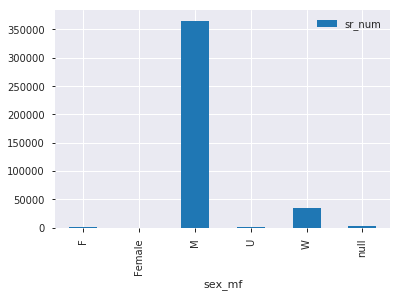

In [204]:
sr_sex = cust_details[['sr_num','sex_mf']].groupby('sex_mf',as_index=False).count()
(sr_sex.shape)
print(sr_sex.plot(kind='bar',x='sex_mf', y="sr_num"))
sr_sex

In [170]:
cust_details_copy = cust_details.copy()

In [177]:
cust_details_copy['repm_ro_dtime'] = pd.to_datetime(cust_details_copy['birth_dt'], errors='coerce')

In [178]:
cust_details_copy['BTyear'] = cust_details_copy['repm_ro_dtime'].dt.year

In [180]:
cust_details_copy['age_cal'] = 2020 -cust_details_copy['BTyear']

In [179]:
cust_details_copy['BTyear'].tail()

426773       NaN
426774    1985.0
426775    1985.0
426776    1987.0
426777    1987.0
Name: BTyear, dtype: float64

In [181]:
cust_details_copy['age_cal'].tail()

426773     NaN
426774    35.0
426775    35.0
426776    33.0
426777    33.0
Name: age_cal, dtype: float64

In [184]:
sr_age = cust_details_copy[['sr_num','age_cal']].groupby('age_cal',as_index=False).count()
(sr_age.shape)
sr_age.head()

,age_cal,sr_num
0,-67.0,1
1,0.0,2
2,1.0,33
3,2.0,118
4,3.0,113


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

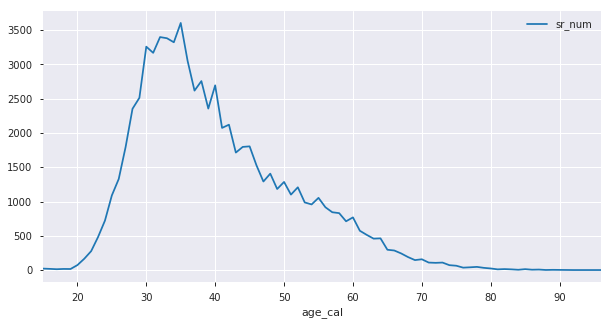

In [570]:
fig = sr_age_filter.plot(x='age_cal', y="sr_num",figsize=(10,5))
fig

In [199]:
sr_age_filter= sr_age[(sr_age['age_cal']>=15) & (sr_age['age_cal']<101)]

AxesSubplot(0.125,0.125;0.775x0.755)


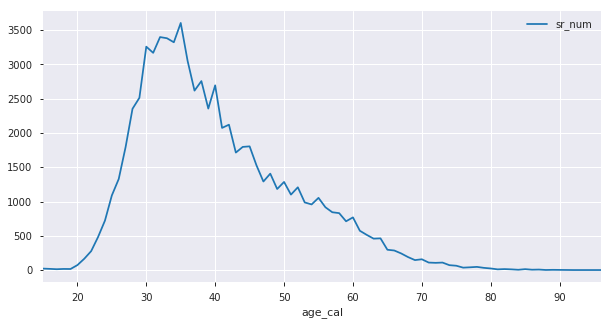

In [205]:
print(sr_age_filter.plot(x='age_cal', y="sr_num",figsize=(10,5)))

In [206]:
cust_details.columns

Index(['asset_id', 'sr_num', 'billable_flg', 'callback_req_flg',
       'comp_und_wrnty_flg', 'prod_und_wrnty_flg', 'row_id', 'pr_con_id',
       'asset_num', 'ext_color_cd', 'fuel_cd', 'model_cd', 'model_yr',
       'warranty_end_dt', 'warranty_start_dt', 'row_id_1', 'last_name',
       'alias_name', 'age', 'annl_incm_amt', 'birth_dt', 'credit_score',
       'per_title', 'occupation', 'sex_mf', 'marital_stat_cd', 'cell_ph_num',
       'con_cd', 'variant_type'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


,sex_mf,sr_num
0,F,1655
1,Female,3
2,M,365562
3,U,2161
4,W,34828
5,null,3216


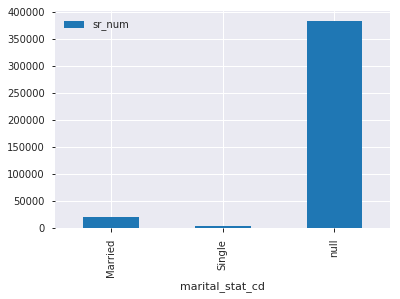

In [207]:
sr_ms = cust_details[['sr_num','marital_stat_cd']].groupby('marital_stat_cd',as_index=False).count()
(sr_ms.shape)
print(sr_ms.plot(kind='bar',x='marital_stat_cd', y="sr_num",))
sr_sex

AxesSubplot(0.125,0.125;0.775x0.755)


,fuel_cd,sr_num
0,Diesel,152989
1,Electric Vehicle,26
2,Gasoline,7
3,Leaded Gasoline,10
4,Petrol,273617
5,Unleaded Gasoline,128
6,null,1


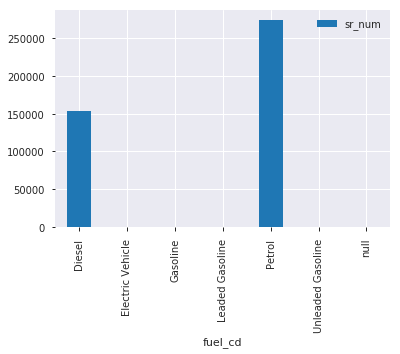

In [208]:
sr_fuel = cust_details[['sr_num','fuel_cd']].groupby('fuel_cd',as_index=False).count()
(sr_fuel.shape)
print(sr_fuel.plot(kind='bar',x='fuel_cd', y="sr_num",))
sr_fuel

In [209]:
cust_details.columns

Index(['asset_id', 'sr_num', 'billable_flg', 'callback_req_flg',
       'comp_und_wrnty_flg', 'prod_und_wrnty_flg', 'row_id', 'pr_con_id',
       'asset_num', 'ext_color_cd', 'fuel_cd', 'model_cd', 'model_yr',
       'warranty_end_dt', 'warranty_start_dt', 'row_id_1', 'last_name',
       'alias_name', 'age', 'annl_incm_amt', 'birth_dt', 'credit_score',
       'per_title', 'occupation', 'sex_mf', 'marital_stat_cd', 'cell_ph_num',
       'con_cd', 'variant_type'],
      dtype='object')

In [228]:
cust_details_test.shape

(3643662, 3)

In [213]:
ser_rcrepm_cmpl_5years_raw.columns

Index(['rownm', 'repm_cmpn_no', 'repm_corp_no', 'repm_dlr_no', 'repm_ro_no',
       'repm_vin', 'repm_cust_no', 'repm_ro_stat', 'repm_estmt_no',
       'repm_bkng_no',
       ...
       'repm_wash_end_dtime', 'repm_wash_advsr_no', 'repm_wash_remark',
       'repm_dlr_code', 'repm_exit_milg', 'repm_file_doc_id',
       'repm_atof_rslt_no', 'repm_fi_stat', 'repm_wash_stat',
       'repm_ro_mobile_flag'],
      dtype='object', length=116)

In [214]:
ser_rcrepm_cmpl_5years_raw.shape

(3643662, 116)

In [216]:
ser_rcrepm_test = ser_rcrepm_cmpl_5years_raw[['repm_vin','repm_ro_no','repm_ro_dtime']]
print(ser_rcrepm_test.shape)
ser_rcrepm_test.head()

(3643662, 3)


,repm_vin,repm_ro_no,repm_ro_dtime
0,MALDN41VR5M005877,R201703734,2017-08-10 14:07:00
1,MALDN41VR5M005877,R201704604,2017-09-27 16:59:13
2,MALDN41VR5M005707,R201502317,2015-07-28 11:17:02
3,MALDN41VR5M005707,R201502884,2015-05-05 09:20:07
4,MALDN41VR5M005312,R201700465,2017-05-26 11:04:03


In [225]:
#getting granular level insights from date
def add_datepart(df, fldname, drop=True):
    
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
    attr = ['Year', 'Month', 'Week', 'Day','hour']
    
    for n in attr: 
        df[targ_pre + n] = getattr(fld.dt, n.lower())
    
    df[targ_pre + "MonthName"] = df[targ_pre + "Month"].astype(int).apply(lambda x: calendar.month_abbr[x])
    df[targ_pre + "MonthKey"] =  df[targ_pre + "Year"].astype(str)+"_"+df[targ_pre + "Month"].astype(str)
    df[targ_pre + "WeekKey"] =  df[targ_pre + "Year"].astype(str)+"_"+df[targ_pre + "Week"].astype(str)
        
    if drop: 
        df.drop(fldname, axis=1, inplace=True)

In [226]:
add_datepart(ser_rcrepm_test,'repm_ro_dtime',False)

In [227]:
ser_rcrepm_test.head()

,repm_vin,repm_ro_no,repm_ro_dtime,repm_ro_dtimeYear,repm_ro_dtimeMonth,repm_ro_dtimeWeek,repm_ro_dtimeDay,repm_ro_dtimehour,repm_ro_dtimeMonthName,repm_ro_dtimeMonthKey,repm_ro_dtimeWeekKey
0,MALDN41VR5M005877,R201703734,2017-08-10 14:07:00,2017,8,32,10,14,Aug,2017_8,2017_32
1,MALDN41VR5M005877,R201704604,2017-09-27 16:59:13,2017,9,39,27,16,Sep,2017_9,2017_39
2,MALDN41VR5M005707,R201502317,2015-07-28 11:17:02,2015,7,31,28,11,Jul,2015_7,2015_31
3,MALDN41VR5M005707,R201502884,2015-05-05 09:20:07,2015,5,19,5,9,May,2015_5,2015_19
4,MALDN41VR5M005312,R201700465,2017-05-26 11:04:03,2017,5,21,26,11,May,2017_5,2017_21


In [ ]:
add_datepart(ser_rcrepm_test,'repm_ro_dtime',False)

In [229]:
cust_details_cmpl_5yr_raw.head()

,asset_id,sr_num,billable_flg,callback_req_flg,comp_und_wrnty_flg,prod_und_wrnty_flg,row_id,pr_con_id,asset_num,ext_color_cd,...,annl_incm_amt,birth_dt,credit_score,per_title,occupation,sex_mf,marital_stat_cd,cell_ph_num,con_cd,variant_type
0,1-2IAF-2041,1-526526592,N,N,N,N,1-2IAF-2041,1-R8NC-38,MALCU41ULEM161550,Pure White,...,None,None,None,M/s.,null,M,null,9824155753,I,CRDi SX(O)1.6 BSIV
1,1-2IAF-2041,1-526471937,N,N,N,N,1-2IAF-2041,1-R8NC-38,MALCU41ULEM161550,Pure White,...,None,None,None,M/s.,null,M,null,9824155753,I,CRDi SX(O)1.6 BSIV
2,1-2IGR-3105,1-495138536,N,N,N,N,1-2IGR-3105,1-2BVQ-1550,MALBB51RLBM318368,CRYSTAL WHITE,...,None,None,None,Mr.,null,M,null,9822430252,I,MAGNA 1.4 DSL BS IV
3,1-8G9U-281,1-972955103,N,N,N,N,1-8G9U-281,1-9R0Q-332,MALA851CMFM292797,Pure White,...,None,None,None,Mr.,null,M,null,7567083223,I,Grand i10 Asta 1.2 Auto
4,1-NSP1-298,1-3546834978,N,N,N,N,1-NSP1-298,1-R3EV-430,MALA851CLJM815430,Polar White,...,None,None,None,Mr.,null,M,null,7869032424,I,Grand i10 Asta 1.2


In [219]:
start_time = datetime.now()
print("start time : ",start_time)
cursor = conn.cursor()
#cursor.execute('select * from gcrm.s_srv_req where created>="2015-01-01" and created<"2021-02-01"')
#cursor.execute('select * from gcrm.s_srv_req limit 5')
cursor.execute(
    """select * from complaint_mart.complaint_attributes_Cmpl_5yr_dist
    """)

#Cmpl_dist_raw = as_pandas(cursor)
Cmpl_dist_raw = as_pandas(cursor)

end_time = datetime.now()

print('Read Duration: {}'.format(end_time - start_time))

print("Cmpl_dist_raw shape:",Cmpl_dist_raw.shape)
Cmpl_dist_raw.head(2)

start time :  2021-03-24 17:12:25.287715
Read Duration: 0:00:54.336835
Cmpl_dist_raw shape: (426665, 20)


,sr_num,cust_con_email,cust_con_ph_num,alt_contact_name,region,sr_status,desc_text,vin,model_cd,delivery_date,open_date,close_date,dealer_code,dealer_name,product,sr_type,sr_area,sr_sub_area,sr_type_cd,publish_cd
0,1-1000317440,null,null,null,South 4,Closed,CSI17-COMPLAINT RELATED TO OIL WAS NOT CHANGED...,MALA851CLGM471942,Grand i10,2016-08-31 00:00:00,2017-09-02 05:25:08,2017-09-22 04:04:39,S8607,Trident Hyundai,Grand i10 Sportz 1.2,Complaint - Service,Quality of repair related,"Poor washing, cleaning, final finish",CR,null
1,1-100041329,null,null,MANISH DESHMUKH,West 1,Closed,"Elite i20, CUSTOMER COMPLAINT THAT HE IS FACIN...",MALBM51RLEM030705,New i20,2014-11-15 00:00:00,2015-03-18 09:59:17,2015-03-20 05:24:28,W2218,Paraskar Hyundai,i20 Asta CRDi,Complaint - Service,Attitude related,Ignorance & lack of explanation,CR,null


In [233]:
complaint_data = Cmpl_dist_raw.copy()

In [234]:
complaint_data_test = complaint_data[['sr_num','vin','open_date']]
print(complaint_data_test.shape)
complaint_data_test.head()

(426665, 3)


,sr_num,vin,open_date
0,1-1000317440,MALA851CLGM471942,2017-09-02 05:25:08
1,1-100041329,MALBM51RLEM030705,2015-03-18 09:59:17
2,1-1005411966,MALBM51RLFM139686,2017-09-04 09:56:13
3,1-100573819,MALAM51CLAM614224,2015-03-19 09:24:39
4,1-100620475,MALA851CLFM239064,2015-03-19 12:55:15


In [238]:
complaint_data_test.head()

,sr_num,vin,open_date,open_Year,open_Month,open_Week,open_Day,open_hour,open_MonthName,open_MonthKey,open_WeekKey
0,1-1000317440,MALA851CLGM471942,2017-09-02 05:25:08,2017,9,35,2,5,Sep,2017_9,2017_35
1,1-100041329,MALBM51RLEM030705,2015-03-18 09:59:17,2015,3,12,18,9,Mar,2015_3,2015_12
2,1-1005411966,MALBM51RLFM139686,2017-09-04 09:56:13,2017,9,36,4,9,Sep,2017_9,2017_36
3,1-100573819,MALAM51CLAM614224,2015-03-19 09:24:39,2015,3,12,19,9,Mar,2015_3,2015_12
4,1-100620475,MALA851CLFM239064,2015-03-19 12:55:15,2015,3,12,19,12,Mar,2015_3,2015_12


In [237]:
add_datepart(complaint_data_test,'open_date',False)

In [235]:
ser_rcrepm_test.head()

,repm_vin,repm_ro_no,repm_ro_dtime,repm_ro_dtimeYear,repm_ro_dtimeMonth,repm_ro_dtimeWeek,repm_ro_dtimeDay,repm_ro_dtimehour,repm_ro_dtimeMonthName,repm_ro_dtimeMonthKey,repm_ro_dtimeWeekKey
0,MALDN41VR5M005877,R201703734,2017-08-10 14:07:00,2017,8,32,10,14,Aug,2017_8,2017_32
1,MALDN41VR5M005877,R201704604,2017-09-27 16:59:13,2017,9,39,27,16,Sep,2017_9,2017_39
2,MALDN41VR5M005707,R201502317,2015-07-28 11:17:02,2015,7,31,28,11,Jul,2015_7,2015_31
3,MALDN41VR5M005707,R201502884,2015-05-05 09:20:07,2015,5,19,5,9,May,2015_5,2015_19
4,MALDN41VR5M005312,R201700465,2017-05-26 11:04:03,2017,5,21,26,11,May,2017_5,2017_21


In [278]:
ser_rcrepm_test['RO']  = 'R'
ser_rcrepm_test['key'] = ser_rcrepm_test["repm_vin"].astype(str) +"_"+ ser_rcrepm_test["repm_ro_dtimeYear"].astype(str) +"_"+ ser_rcrepm_test["repm_ro_dtimeMonth"].astype(str) +"_"+ ser_rcrepm_test["repm_ro_dtimeWeek"].astype(str) + "_" + ser_rcrepm_test["repm_ro_dtimeDay"].astype(str) + "_" + ser_rcrepm_test["repm_ro_dtimehour"].astype(str)

In [279]:
ser_rcrepm_test.head()

,repm_vin,repm_ro_no,repm_ro_dtime,repm_ro_dtimeYear,repm_ro_dtimeMonth,repm_ro_dtimeWeek,repm_ro_dtimeDay,repm_ro_dtimehour,repm_ro_dtimeMonthName,repm_ro_dtimeMonthKey,repm_ro_dtimeWeekKey,key,RO
0,MALDN41VR5M005877,R201703734,2017-08-10 14:07:00,2017,8,32,10,14,Aug,2017_8,2017_32,MALDN41VR5M005877_2017_8_32_10_14,R
1,MALDN41VR5M005877,R201704604,2017-09-27 16:59:13,2017,9,39,27,16,Sep,2017_9,2017_39,MALDN41VR5M005877_2017_9_39_27_16,R
2,MALDN41VR5M005707,R201502317,2015-07-28 11:17:02,2015,7,31,28,11,Jul,2015_7,2015_31,MALDN41VR5M005707_2015_7_31_28_11,R
3,MALDN41VR5M005707,R201502884,2015-05-05 09:20:07,2015,5,19,5,9,May,2015_5,2015_19,MALDN41VR5M005707_2015_5_19_5_9,R
4,MALDN41VR5M005312,R201700465,2017-05-26 11:04:03,2017,5,21,26,11,May,2017_5,2017_21,MALDN41VR5M005312_2017_5_21_26_11,R


In [288]:
complaint_data_test['complaint'] = 'C'
complaint_data_test["repm_vin"] = complaint_data_test["vin"]
complaint_data_test['key'] = complaint_data_test["vin"].astype(str) +"_"+ complaint_data_test["open_Year"].astype(str) +"_"+ complaint_data_test["open_Month"].astype(str) +"_"+ complaint_data_test["open_Week"].astype(str) + "_" + complaint_data_test["open_Day"].astype(str) + "_" + complaint_data_test["open_hour"].astype(str)

In [289]:
complaint_data_test.head()

,sr_num,vin,open_date,open_Year,open_Month,open_Week,open_Day,open_hour,open_MonthName,open_MonthKey,open_WeekKey,key,complaint,repm_vin
0,1-1000317440,MALA851CLGM471942,2017-09-02 05:25:08,2017,9,35,2,5,Sep,2017_9,2017_35,MALA851CLGM471942_2017_9_35_2_5,C,MALA851CLGM471942
1,1-100041329,MALBM51RLEM030705,2015-03-18 09:59:17,2015,3,12,18,9,Mar,2015_3,2015_12,MALBM51RLEM030705_2015_3_12_18_9,C,MALBM51RLEM030705
2,1-1005411966,MALBM51RLFM139686,2017-09-04 09:56:13,2017,9,36,4,9,Sep,2017_9,2017_36,MALBM51RLFM139686_2017_9_36_4_9,C,MALBM51RLFM139686
3,1-100573819,MALAM51CLAM614224,2015-03-19 09:24:39,2015,3,12,19,9,Mar,2015_3,2015_12,MALAM51CLAM614224_2015_3_12_19_9,C,MALAM51CLAM614224
4,1-100620475,MALA851CLFM239064,2015-03-19 12:55:15,2015,3,12,19,12,Mar,2015_3,2015_12,MALA851CLFM239064_2015_3_12_19_12,C,MALA851CLFM239064


In [463]:
ser_rcrepm_test.shape

(3643662, 13)

In [464]:
complaint_data_test.shape

(426665, 14)

In [290]:
merger = pd.merge(ser_rcrepm_test,complaint_data_test,on='key',indicator=True,how='outer')

In [472]:
4063585+3401

4066986

In [291]:
print(merger.shape)
display(merger['_merge'].value_counts())
merger.head()

(4066986, 27)


left_only     3640286
right_only     423299
both             3401
Name: _merge, dtype: int64

,repm_vin_x,repm_ro_no,repm_ro_dtime,repm_ro_dtimeYear,repm_ro_dtimeMonth,repm_ro_dtimeWeek,repm_ro_dtimeDay,repm_ro_dtimehour,repm_ro_dtimeMonthName,repm_ro_dtimeMonthKey,...,open_Month,open_Week,open_Day,open_hour,open_MonthName,open_MonthKey,open_WeekKey,complaint,repm_vin_y,_merge
0,MALDN41VR5M005877,R201703734,2017-08-10 14:07:00,2017.0,8.0,32.0,10.0,14.0,Aug,2017_8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,MALDN41VR5M005877,R201704604,2017-09-27 16:59:13,2017.0,9.0,39.0,27.0,16.0,Sep,2017_9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,MALDN41VR5M005707,R201502317,2015-07-28 11:17:02,2015.0,7.0,31.0,28.0,11.0,Jul,2015_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,MALDN41VR5M005707,R201502884,2015-05-05 09:20:07,2015.0,5.0,19.0,5.0,9.0,May,2015_5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,MALDN41VR5M005312,R201700465,2017-05-26 11:04:03,2017.0,5.0,21.0,26.0,11.0,May,2017_5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [292]:
merger.columns

Index(['repm_vin_x', 'repm_ro_no', 'repm_ro_dtime', 'repm_ro_dtimeYear',
       'repm_ro_dtimeMonth', 'repm_ro_dtimeWeek', 'repm_ro_dtimeDay',
       'repm_ro_dtimehour', 'repm_ro_dtimeMonthName', 'repm_ro_dtimeMonthKey',
       'repm_ro_dtimeWeekKey', 'key', 'RO', 'sr_num', 'vin', 'open_date',
       'open_Year', 'open_Month', 'open_Week', 'open_Day', 'open_hour',
       'open_MonthName', 'open_MonthKey', 'open_WeekKey', 'complaint',
       'repm_vin_y', '_merge'],
      dtype='object')

In [293]:
df2 = merger.copy()

In [465]:
df2.shape

(4066986, 27)

In [294]:
from natsort import natsorted
from natsort import natsorted, index_natsorted, order_by_index

In [295]:
#df2=natsorted(df2,df2['ORDER_DATEWeekKey'],)
df2 = df2.reindex(index=order_by_index(df2.index, index_natsorted(df2.key))) 

In [302]:
df_new = df2.reset_index()

In [303]:
df_new.head()

,index,repm_vin_x,repm_ro_no,repm_ro_dtime,repm_ro_dtimeYear,repm_ro_dtimeMonth,repm_ro_dtimeWeek,repm_ro_dtimeDay,repm_ro_dtimehour,repm_ro_dtimeMonthName,...,open_Month,open_Week,open_Day,open_hour,open_MonthName,open_MonthKey,open_WeekKey,complaint,repm_vin_y,_merge
0,3874205,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,31.0,5.0,10.0,Aug,2016_8,2016_31,C,MALA851DLGM502233,right_only
1,3159184,KMHJM81VR5U152056,R201507669,2015-03-24 09:43:34,2015.0,3.0,13.0,24.0,9.0,Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3838927,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,16.0,12.0,Mar,2016_3,2016_11,C,KMHJM81VR5U152056,right_only
3,3159183,KMHJM81VR5U152056,R201603623,2016-03-29 14:41:48,2016.0,3.0,13.0,29.0,14.0,Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,3159181,KMHJM81VR5U157487,R201700040,2017-06-01 11:03:15,2017.0,6.0,22.0,1.0,11.0,Jun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [469]:
print(df_new.shape)
print(df_new.columns)
df_new.head()

(4066986, 28)
Index(['index', 'repm_vin_x', 'repm_ro_no', 'repm_ro_dtime',
       'repm_ro_dtimeYear', 'repm_ro_dtimeMonth', 'repm_ro_dtimeWeek',
       'repm_ro_dtimeDay', 'repm_ro_dtimehour', 'repm_ro_dtimeMonthName',
       'repm_ro_dtimeMonthKey', 'repm_ro_dtimeWeekKey', 'key', 'RO', 'sr_num',
       'vin', 'open_date', 'open_Year', 'open_Month', 'open_Week', 'open_Day',
       'open_hour', 'open_MonthName', 'open_MonthKey', 'open_WeekKey',
       'complaint', 'repm_vin_y', '_merge'],
      dtype='object')


,index,repm_vin_x,repm_ro_no,repm_ro_dtime,repm_ro_dtimeYear,repm_ro_dtimeMonth,repm_ro_dtimeWeek,repm_ro_dtimeDay,repm_ro_dtimehour,repm_ro_dtimeMonthName,...,open_Month,open_Week,open_Day,open_hour,open_MonthName,open_MonthKey,open_WeekKey,complaint,repm_vin_y,_merge
0,3874205,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,31.0,5.0,10.0,Aug,2016_8,2016_31,C,MALA851DLGM502233,right_only
1,3159184,KMHJM81VR5U152056,R201507669,2015-03-24 09:43:34,2015.0,3.0,13.0,24.0,9.0,Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3838927,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,16.0,12.0,Mar,2016_3,2016_11,C,KMHJM81VR5U152056,right_only
3,3159183,KMHJM81VR5U152056,R201603623,2016-03-29 14:41:48,2016.0,3.0,13.0,29.0,14.0,Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,3159181,KMHJM81VR5U157487,R201700040,2017-06-01 11:03:15,2017.0,6.0,22.0,1.0,11.0,Jun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [476]:
test_logic = df_new[df_new['_merge']!='both'][['repm_ro_no','repm_vin_x','RO','repm_ro_dtime','sr_num','repm_vin_y','complaint','open_date','key','_merge']]
print(test_logic.shape)
test_logic.head()

(4063585, 10)


,repm_ro_no,repm_vin_x,RO,repm_ro_dtime,sr_num,repm_vin_y,complaint,open_date,key,_merge
0,NaN,NaN,NaN,NaT,1-535349069,MALA851DLGM502233,C,2016-08-05 10:59:06,MALA851DLGM502233_2016_8_31_5_10,right_only
1,R201507669,KMHJM81VR5U152056,R,2015-03-24 09:43:34,NaN,NaN,NaN,NaT,KMHJM81VR5U152056_2015_3_13_24_9,left_only
2,NaN,NaN,NaN,NaT,1-419093458,KMHJM81VR5U152056,C,2016-03-16 12:02:14,KMHJM81VR5U152056_2016_3_11_16_12,right_only
3,R201603623,KMHJM81VR5U152056,R,2016-03-29 14:41:48,NaN,NaN,NaN,NaT,KMHJM81VR5U152056_2016_3_13_29_14,left_only
4,R201700040,KMHJM81VR5U157487,R,2017-06-01 11:03:15,NaN,NaN,NaN,NaT,KMHJM81VR5U157487_2017_6_22_1_11,left_only


In [479]:
test_logic["vin"] = np.where((test_logic["_merge"] =="right_only"), test_logic['repm_vin_y'],test_logic["repm_vin_x"])
test_logic["SR_RO_No"] = np.where((test_logic["_merge"] =="right_only"), test_logic['sr_num'],test_logic["repm_ro_no"])
test_logic["SR_RO_type"] = np.where((test_logic["_merge"] =="right_only"), test_logic['complaint'],test_logic["RO"])
test_logic["SR_RO_Time"] = np.where((test_logic["_merge"] =="right_only"), test_logic['open_date'],test_logic["repm_ro_dtime"])

In [480]:
print(test_logic.columns)
test_logic.head()

Index(['repm_ro_no', 'repm_vin_x', 'RO', 'repm_ro_dtime', 'sr_num',
       'repm_vin_y', 'complaint', 'open_date', 'key', '_merge', 'vin',
       'SR_RO_type', 'SR_RO_Time', 'SR_RO_No'],
      dtype='object')


,repm_ro_no,repm_vin_x,RO,repm_ro_dtime,sr_num,repm_vin_y,complaint,open_date,key,_merge,vin,SR_RO_type,SR_RO_Time,SR_RO_No
0,NaN,NaN,NaN,NaT,1-535349069,MALA851DLGM502233,C,2016-08-05 10:59:06,MALA851DLGM502233_2016_8_31_5_10,right_only,MALA851DLGM502233,C,2016-08-05 10:59:06,1-535349069
1,R201507669,KMHJM81VR5U152056,R,2015-03-24 09:43:34,NaN,NaN,NaN,NaT,KMHJM81VR5U152056_2015_3_13_24_9,left_only,KMHJM81VR5U152056,R,2015-03-24 09:43:34,R201507669
2,NaN,NaN,NaN,NaT,1-419093458,KMHJM81VR5U152056,C,2016-03-16 12:02:14,KMHJM81VR5U152056_2016_3_11_16_12,right_only,KMHJM81VR5U152056,C,2016-03-16 12:02:14,1-419093458
3,R201603623,KMHJM81VR5U152056,R,2016-03-29 14:41:48,NaN,NaN,NaN,NaT,KMHJM81VR5U152056_2016_3_13_29_14,left_only,KMHJM81VR5U152056,R,2016-03-29 14:41:48,R201603623
4,R201700040,KMHJM81VR5U157487,R,2017-06-01 11:03:15,NaN,NaN,NaN,NaT,KMHJM81VR5U157487_2017_6_22_1_11,left_only,KMHJM81VR5U157487,R,2017-06-01 11:03:15,R201700040


In [483]:
test_logic1 = test_logic[['vin','SR_RO_type', 'SR_RO_Time', 'SR_RO_No','key']]
print(test_logic1.shape)
test_logic1.head()

(4063585, 5)


,vin,SR_RO_type,SR_RO_Time,SR_RO_No,key
0,MALA851DLGM502233,C,2016-08-05 10:59:06,1-535349069,MALA851DLGM502233_2016_8_31_5_10
1,KMHJM81VR5U152056,R,2015-03-24 09:43:34,R201507669,KMHJM81VR5U152056_2015_3_13_24_9
2,KMHJM81VR5U152056,C,2016-03-16 12:02:14,1-419093458,KMHJM81VR5U152056_2016_3_11_16_12
3,KMHJM81VR5U152056,R,2016-03-29 14:41:48,R201603623,KMHJM81VR5U152056_2016_3_13_29_14
4,KMHJM81VR5U157487,R,2017-06-01 11:03:15,R201700040,KMHJM81VR5U157487_2017_6_22_1_11


In [531]:
test_logic1["RO_key"] =0
test_logic1["RO_No"] =0
test_logic1["RO_vin"] =0
test_logic1["RO_time"] =0
#test_logic1 =test_logic1[1:100]
test_logic1.head()

,index,vin,SR_RO_type,SR_RO_Time,SR_RO_No,key,RO_key,RO_No,RO_vin,RO_time
0,0,MALA851DLGM502233,C,2016-08-05 10:59:06,1-535349069,MALA851DLGM502233_2016_8_31_5_10,0,0,0,0
1,1,KMHJM81VR5U152056,R,2015-03-24 09:43:34,R201507669,KMHJM81VR5U152056_2015_3_13_24_9,0,0,0,0
2,2,KMHJM81VR5U152056,C,2016-03-16 12:02:14,1-419093458,KMHJM81VR5U152056_2016_3_11_16_12,0,0,0,0
3,3,KMHJM81VR5U152056,R,2016-03-29 14:41:48,R201603623,KMHJM81VR5U152056_2016_3_13_29_14,0,0,0,0
4,4,KMHJM81VR5U157487,R,2017-06-01 11:03:15,R201700040,KMHJM81VR5U157487_2017_6_22_1_11,0,0,0,0


In [532]:
test_logic1 = test_logic1.reset_index()
test_logic1.head()

,level_0,index,vin,SR_RO_type,SR_RO_Time,SR_RO_No,key,RO_key,RO_No,RO_vin,RO_time
0,0,0,MALA851DLGM502233,C,2016-08-05 10:59:06,1-535349069,MALA851DLGM502233_2016_8_31_5_10,0,0,0,0
1,1,1,KMHJM81VR5U152056,R,2015-03-24 09:43:34,R201507669,KMHJM81VR5U152056_2015_3_13_24_9,0,0,0,0
2,2,2,KMHJM81VR5U152056,C,2016-03-16 12:02:14,1-419093458,KMHJM81VR5U152056_2016_3_11_16_12,0,0,0,0
3,3,3,KMHJM81VR5U152056,R,2016-03-29 14:41:48,R201603623,KMHJM81VR5U152056_2016_3_13_29_14,0,0,0,0
4,4,4,KMHJM81VR5U157487,R,2017-06-01 11:03:15,R201700040,KMHJM81VR5U157487_2017_6_22_1_11,0,0,0,0


In [533]:
test_logic1.drop(['level_0','index'], axis=1,inplace=True)

In [534]:
test_logic1.head(2)

,vin,SR_RO_type,SR_RO_Time,SR_RO_No,key,RO_key,RO_No,RO_vin,RO_time
0,MALA851DLGM502233,C,2016-08-05 10:59:06,1-535349069,MALA851DLGM502233_2016_8_31_5_10,0,0,0,0
1,KMHJM81VR5U152056,R,2015-03-24 09:43:34,R201507669,KMHJM81VR5U152056_2015_3_13_24_9,0,0,0,0



for index, row in test_logic2.iterrows():
    if (index !=0) and (test_logic2.loc[index, 'SR_RO_type'] == 'C') and (test_logic2.loc[index-1,'vin'] == test_logic2.loc[index,'vin']):
        #  and (
        #test_logic2.loc[index,'RO_key'] = test_logic2.loc[index-1,'key']
        #test_logic2.loc[index,'RO_No'] = test_logic2.loc[index-1,'SR_RO_No']
        #test_logic2.loc[index,'RO_vin'] = test_logic2.loc[index-1,'vin']
        #test_logic2.loc[index,'RO_time'] = test_logic2.loc[index-1,'SR_RO_Time']
        print(index)
test_logic2.head()


for index, row in df.iterrows():
    if (index !=0) and (df.loc[index, 'SR_RO_type'] == 'C'):
        df.loc[index,'RO_key'] = df.loc[index-1,'key']
        df.loc[index,'RO_No'] = df.loc[index-1,'SR_RO_No']
        df.loc[index,'RO_vin'] = df.loc[index-1,'vin']
        df.loc[index,'RO_time'] = df.loc[index-1,'SR_RO_Time']
        #print(index-1)
df.head()

In [537]:
test_logic1[37160:37200] #37188 index error due to dataframe split

,vin,SR_RO_type,SR_RO_Time,SR_RO_No,key,RO_key,RO_No,RO_vin,RO_time
37160,MALA151FLCM109058,R,2017-03-08 12:53:28,R201702932,MALA151FLCM109058_2017_3_10_8_12,0,0,0,0
37161,MALA151FLCM109058,R,2017-03-09 12:42:08,R201703040,MALA151FLCM109058_2017_3_10_9_12,0,0,0,0
37162,MALA151FLCM110658,R,2015-07-13 09:20:50,R201510987,MALA151FLCM110658_2015_7_29_13_9,0,0,0,0
37163,MALA151FLCM110658,R,2015-07-15 15:00:00,R201511142,MALA151FLCM110658_2015_7_29_15_15,0,0,0,0
37164,MALA151FLCM110658,R,2016-06-16 10:18:43,R201610324,MALA151FLCM110658_2016_6_24_16_10,0,0,0,0
37165,MALA151FLCM110658,R,2017-05-27 14:48:30,R201708574,MALA151FLCM110658_2017_5_21_27_14,0,0,0,0
37166,MALA151FLCM110658,R,2018-04-30 09:13:00,R201806722,MALA151FLCM110658_2018_4_18_30_9,0,0,0,0
37167,MALA151FLCM110658,R,2018-11-28 11:47:32,R201819492,MALA151FLCM110658_2018_11_48_28_11,0,0,0,0
37168,MALA151FLCM110658,R,2019-11-19 09:51:09,R201920344,MALA151FLCM110658_2019_11_47_19_9,0,0,0,0
37169,MALA151FLCM111661,C,2016-05-02 11:24:28,1-483080931,MALA151FLCM111661_2016_5_18_2_11,0,0,0,0


In [ ]:
start_time = datetime.now()
print("start time : ",start_time)

for index, row in test_logic1.iterrows():
    if (index !=0) and (test_logic1.loc[index, 'SR_RO_type'] == 'C') and (test_logic1.loc[index,'vin'] == test_logic1.loc[index-1,'vin']):
        test_logic1.loc[index,'RO_key'] = test_logic1.loc[index-1,'key']
        test_logic1.loc[index,'RO_No'] = test_logic1.loc[index-1,'SR_RO_No']
        test_logic1.loc[index,'RO_vin'] = test_logic1.loc[index-1,'vin']
        test_logic1.loc[index,'RO_time'] = test_logic1.loc[index-1,'SR_RO_Time']
        #print(index-1)
        
test_logic1.head()
end_time = datetime.now()
print('Read Duration: {}'.format(end_time - start_time))


start time :  2021-03-30 14:00:53.770589


In [543]:
Logic_c= test_logic1[test_logic1["SR_RO_type"]=='C']
Logic_c.shape

(423299, 9)

In [544]:
Logic_c.head()

,vin,SR_RO_type,SR_RO_Time,SR_RO_No,key,RO_key,RO_No,RO_vin,RO_time
0,MALA851DLGM502233,C,2016-08-05 10:59:06,1-535349069,MALA851DLGM502233_2016_8_31_5_10,0,0,0,0
2,KMHJM81VR5U152056,C,2016-03-16 12:02:14,1-419093458,KMHJM81VR5U152056_2016_3_11_16_12,KMHJM81VR5U152056_2015_3_13_24_9,R201507669,KMHJM81VR5U152056,2015-03-24 09:43:34
5,KMHJM81VR5U157487,C,2017-09-23 12:54:17,1-1053234594,KMHJM81VR5U157487_2017_9_38_23_12,KMHJM81VR5U157487_2017_6_22_1_11,R201700040,KMHJM81VR5U157487,2017-06-01 11:03:15
8,KMHJM81VR5U196923,C,2015-07-29 06:17:36,1-196065307,KMHJM81VR5U196923_2015_7_31_29_6,KMHJM81VR5U196923_2015_7_31_28_14,R201504153,KMHJM81VR5U196923,2015-07-28 14:18:16
15,KMHJM81VR5U210789,C,2016-01-21 05:36:47,1-367965931,KMHJM81VR5U210789_2016_1_3_21_5,KMHJM81VR5U210789_2016_1_1_7_9,R201600054,KMHJM81VR5U210789,2016-01-07 09:07:06


In [546]:
Logic_c.columns = ['SR_vin','SR_Type','SR_Time','SR_Num','SR_Key','RO_Key','RO_Num','RO_Vin','RO_Time']
Logic_c.head()

,SR_vin,SR_Type,SR_Time,SR_Num,SR_Key,RO_Key,RO_Num,RO_Vin,RO_Time
0,MALA851DLGM502233,C,2016-08-05 10:59:06,1-535349069,MALA851DLGM502233_2016_8_31_5_10,0,0,0,0
2,KMHJM81VR5U152056,C,2016-03-16 12:02:14,1-419093458,KMHJM81VR5U152056_2016_3_11_16_12,KMHJM81VR5U152056_2015_3_13_24_9,R201507669,KMHJM81VR5U152056,2015-03-24 09:43:34
5,KMHJM81VR5U157487,C,2017-09-23 12:54:17,1-1053234594,KMHJM81VR5U157487_2017_9_38_23_12,KMHJM81VR5U157487_2017_6_22_1_11,R201700040,KMHJM81VR5U157487,2017-06-01 11:03:15
8,KMHJM81VR5U196923,C,2015-07-29 06:17:36,1-196065307,KMHJM81VR5U196923_2015_7_31_29_6,KMHJM81VR5U196923_2015_7_31_28_14,R201504153,KMHJM81VR5U196923,2015-07-28 14:18:16
15,KMHJM81VR5U210789,C,2016-01-21 05:36:47,1-367965931,KMHJM81VR5U210789_2016_1_3_21_5,KMHJM81VR5U210789_2016_1_1_7_9,R201600054,KMHJM81VR5U210789,2016-01-07 09:07:06


In [549]:
Logic_c.shape

(423299, 9)

In [552]:
df= Logic_c[1:423299].copy()
df.shape

(423298, 9)

In [555]:
df['repm_complaint_time'] = pd.to_datetime(df['SR_Time'])
df['RO_time'] = pd.to_datetime(df['RO_Time'], errors='coerce')

In [556]:
df['date_diff_day'] = (df['repm_complaint_time']-df['RO_time']).dt.days
df['date_diff_min'] = (df['repm_complaint_time']-df['RO_time']).dt.total_seconds()/60

In [557]:
df.head()

,SR_vin,SR_Type,SR_Time,SR_Num,SR_Key,RO_Key,RO_Num,RO_Vin,RO_Time,repm_complaint_time,RO_time,date_diff_day,date_diff_min
2,KMHJM81VR5U152056,C,2016-03-16 12:02:14,1-419093458,KMHJM81VR5U152056_2016_3_11_16_12,KMHJM81VR5U152056_2015_3_13_24_9,R201507669,KMHJM81VR5U152056,2015-03-24 09:43:34,2016-03-16 12:02:14,2015-03-24 09:43:34,358.0,515658.666667
5,KMHJM81VR5U157487,C,2017-09-23 12:54:17,1-1053234594,KMHJM81VR5U157487_2017_9_38_23_12,KMHJM81VR5U157487_2017_6_22_1_11,R201700040,KMHJM81VR5U157487,2017-06-01 11:03:15,2017-09-23 12:54:17,2017-06-01 11:03:15,114.0,164271.033333
8,KMHJM81VR5U196923,C,2015-07-29 06:17:36,1-196065307,KMHJM81VR5U196923_2015_7_31_29_6,KMHJM81VR5U196923_2015_7_31_28_14,R201504153,KMHJM81VR5U196923,2015-07-28 14:18:16,2015-07-29 06:17:36,2015-07-28 14:18:16,0.0,959.333333
15,KMHJM81VR5U210789,C,2016-01-21 05:36:47,1-367965931,KMHJM81VR5U210789_2016_1_3_21_5,KMHJM81VR5U210789_2016_1_1_7_9,R201600054,KMHJM81VR5U210789,2016-01-07 09:07:06,2016-01-21 05:36:47,2016-01-07 09:07:06,13.0,19949.683333
29,KMHJM81VR5U214871,C,2015-09-25 04:51:37,1-252104598,KMHJM81VR5U214871_2015_9_39_25_4,KMHJM81VR5U214871_2015_9_38_15_12,R201502220,KMHJM81VR5U214871,2015-09-15 12:16:35,2015-09-25 04:51:37,2015-09-15 12:16:35,9.0,13955.033333


In [ ]:
df_30days = df[df['date_diff_day']<30]

In [559]:
df[df['date_diff_day']<30].shape

(65072, 13)

In [574]:
65072/431095

0.15094584720305268

In [573]:
df['date_diff_day'].max()

1743.0

AxesSubplot(0.125,0.125;0.775x0.755)
104221


,date_diff_day,SR_Num
0,-29.0,1
1,-28.0,1
2,-27.0,1
3,-26.0,1
4,-25.0,3
5,-23.0,2
6,-21.0,3
7,-20.0,5
8,-16.0,2
9,-15.0,1


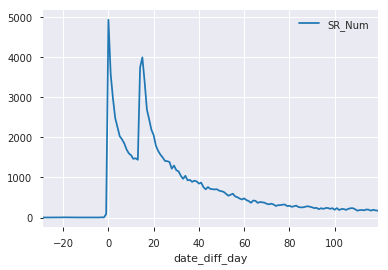

In [579]:
df_30days = df[(df['date_diff_day']<120) & (df['date_diff_day']>=0)][['SR_Num','date_diff_day']].groupby('date_diff_day',as_index=False).count()
print(df_30days.plot(x='date_diff_day', y="SR_Num"))
print(df_30days.SR_Num.sum())
df_30days

In [586]:
df.columns

Index(['SR_vin', 'SR_Type', 'SR_Time', 'SR_Num', 'SR_Key', 'RO_Key', 'RO_Num',
       'RO_Vin', 'RO_Time', 'repm_complaint_time', 'RO_time', 'date_diff_day',
       'date_diff_min'],
      dtype='object')

In [582]:
noisylist = pd.read_excel("noisylist.xlsx")
noisylist.shape

(9100, 3)

In [583]:
noisylist.head(2)

,Unnamed: 0,sr_num,publish_cd
0,68,1-3885189752,SM-Twitter
1,88,1-3874555543,SM-Twitter


In [584]:
noisy_map = pd.Series(noisylist.publish_cd.values,index=noisylist.sr_num).to_dict()

In [588]:
df['noisy_CD'] = df.SR_Num.map(noisy_map)

In [591]:
df.noisy_CD.count()

9006

In [604]:
df.noisy_yes.value_counts()

nan    414292
yes      9006
Name: noisy_yes, dtype: int64

In [601]:
df.noisy_CD.notna().sum()

9006

AxesSubplot(0.125,0.125;0.775x0.755)
1775


,date_diff_day,SR_Num
0,-1.0,1
1,0.0,140
2,1.0,115
3,2.0,96
4,3.0,64
5,4.0,77
6,5.0,58
7,6.0,53
8,7.0,48
9,8.0,27


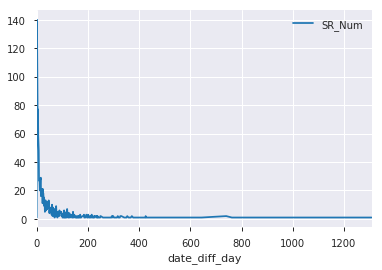

In [612]:
dfny_days = df[(df['noisy_yes']=='yes')][['SR_Num','date_diff_day']].groupby('date_diff_day',as_index=False).count()
print(dfny_days.plot(x='date_diff_day', y="SR_Num"))
print(dfny_days.SR_Num.sum())
dfny_days

AxesSubplot(0.125,0.125;0.775x0.755)
1092


,date_diff_day,SR_Num
0,0.0,140
1,1.0,115
2,2.0,96
3,3.0,64
4,4.0,77
5,5.0,58
6,6.0,53
7,7.0,48
8,8.0,27
9,9.0,27


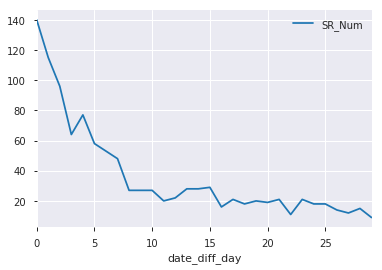

In [608]:
dfny_30days = df[(df['noisy_yes']=='yes') & (df['date_diff_day']<30) & (df['date_diff_day']>=0)][['SR_Num','date_diff_day']].groupby('date_diff_day',as_index=False).count()
print(dfny_30days.plot(x='date_diff_day', y="SR_Num"))
print(dfny_30days.SR_Num.sum())
dfny_30days

In [603]:
df['noisy_yes']= np.where(df['noisy_CD'].notna(),'yes',np.nan)
df.head()

,SR_vin,SR_Type,SR_Time,SR_Num,SR_Key,RO_Key,RO_Num,RO_Vin,RO_Time,repm_complaint_time,RO_time,date_diff_day,date_diff_min,noisy_CD,noisy_yes
2,KMHJM81VR5U152056,C,2016-03-16 12:02:14,1-419093458,KMHJM81VR5U152056_2016_3_11_16_12,KMHJM81VR5U152056_2015_3_13_24_9,R201507669,KMHJM81VR5U152056,2015-03-24 09:43:34,2016-03-16 12:02:14,2015-03-24 09:43:34,358.0,515658.666667,NaN,nan
5,KMHJM81VR5U157487,C,2017-09-23 12:54:17,1-1053234594,KMHJM81VR5U157487_2017_9_38_23_12,KMHJM81VR5U157487_2017_6_22_1_11,R201700040,KMHJM81VR5U157487,2017-06-01 11:03:15,2017-09-23 12:54:17,2017-06-01 11:03:15,114.0,164271.033333,NaN,nan
8,KMHJM81VR5U196923,C,2015-07-29 06:17:36,1-196065307,KMHJM81VR5U196923_2015_7_31_29_6,KMHJM81VR5U196923_2015_7_31_28_14,R201504153,KMHJM81VR5U196923,2015-07-28 14:18:16,2015-07-29 06:17:36,2015-07-28 14:18:16,0.0,959.333333,MD,yes
15,KMHJM81VR5U210789,C,2016-01-21 05:36:47,1-367965931,KMHJM81VR5U210789_2016_1_3_21_5,KMHJM81VR5U210789_2016_1_1_7_9,R201600054,KMHJM81VR5U210789,2016-01-07 09:07:06,2016-01-21 05:36:47,2016-01-07 09:07:06,13.0,19949.683333,NaN,nan
29,KMHJM81VR5U214871,C,2015-09-25 04:51:37,1-252104598,KMHJM81VR5U214871_2015_9_39_25_4,KMHJM81VR5U214871_2015_9_38_15_12,R201502220,KMHJM81VR5U214871,2015-09-15 12:16:35,2015-09-25 04:51:37,2015-09-15 12:16:35,9.0,13955.033333,NaN,nan


In [610]:
def split(df,name):
    m = df.SR_vin.unique().tolist()
    n = 100000
    last = 0
    r = 1
    #name = name
    #path = r'/home/soni/new/'
    while last<len(m):
        df_new = df[df.SR_vin.isin(m[int(last):int(last+n)])]
        print(df_new.shape)
        name1 = name + '_' + str(r)
        #file = path+'\\'+name+'.xlsx'
        file = name1+'.xlsx'
        last+=n
        r+=1
        df_new.to_excel(file, encoding='utf-8', index=False)

In [611]:
split(df,'last_RO_SR_Matched')

(119695, 15)
(121493, 15)
(120198, 15)
(61912, 15)


In [148]:
start_time = datetime.now()
print("start time : ",start_time)

cursor = conn.cursor()
cursor.execute('select * from complaint_mart.s_srv_req_cmpl_5yr_cust_details')
#cursor.execute('select * from gcrm.temp_s_srv_req_x_20210217')
#cursor.execute('SELECT count(*),max(created),min(created) FROM s_srv_req where created >= "2015-01-01" and created < "2021-01-01"')
cust_details_first_raw = as_pandas(cursor)
#lov_raw = pd.DataFrame(cursor)


end_time = datetime.now()

print('Read Duration: {}'.format(end_time - start_time))

print("lov_raw shape:",cust_details_first_raw.shape)
cust_details_first_raw.head(2)

start time :  2021-03-24 11:09:01.408704
Read Duration: 0:00:57.229591
lov_raw shape: (407425, 29)


,asset_id,sr_num,billable_flg,callback_req_flg,comp_und_wrnty_flg,prod_und_wrnty_flg,row_id,pr_con_id,asset_num,ext_color_cd,...,annl_incm_amt,birth_dt,credit_score,per_title,occupation,sex_mf,marital_stat_cd,cell_ph_num,con_cd,variant_type
0,1-HNIZ-210,1-868944922,N,N,N,N,1-HNIZ-210,1-LO73-106,MALBM51RLHM386558,Polar White,...,None,None,None,Mr.,null,M,null,9975007707,I,i20 Sportz CRDi
1,1-DM2N-159,1-625972943,N,N,N,N,1-DM2N-159,1-LOWP-634,MALA741CLGM187525,Sleek Silver,...,None,1981-01-01 00:00:00,None,Mr.,null,M,Married,9085090619,I,Xcent VTVT + ABS


In [580]:
cust_details_first_raw.columns

Index(['asset_id', 'sr_num', 'billable_flg', 'callback_req_flg',
       'comp_und_wrnty_flg', 'prod_und_wrnty_flg', 'row_id', 'pr_con_id',
       'asset_num', 'ext_color_cd', 'fuel_cd', 'model_cd', 'model_yr',
       'warranty_end_dt', 'warranty_start_dt', 'row_id_1', 'last_name',
       'alias_name', 'age', 'annl_incm_amt', 'birth_dt', 'credit_score',
       'per_title', 'occupation', 'sex_mf', 'marital_stat_cd', 'cell_ph_num',
       'con_cd', 'variant_type'],
      dtype='object')

In [149]:
cust_details_first_raw.occupation.value_counts()

null    407425
Name: occupation, dtype: int64

In [150]:
cust_details_first_raw.age.value_counts()

Series([], Name: age, dtype: int64)